Saving links.csv to links (1).csv
Saving movies.csv to movies (1).csv
Saving ratings.csv to ratings (1).csv


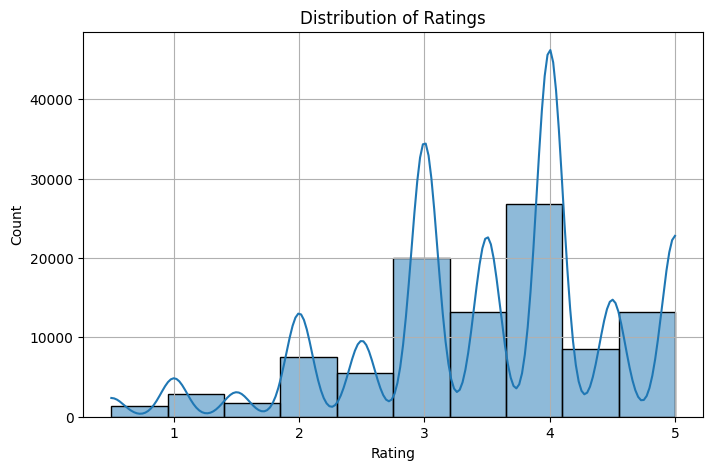

/tmp/ipython-input-2111109075.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='magma')


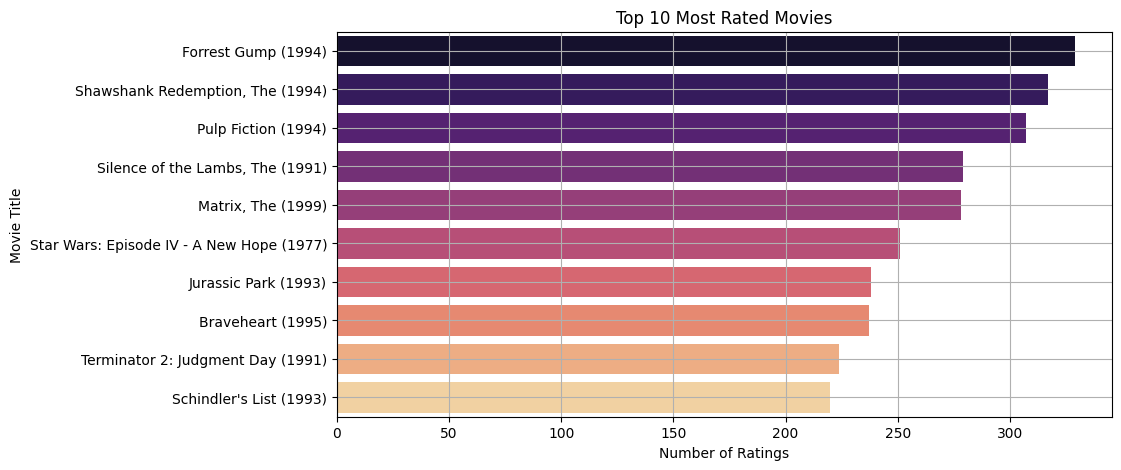

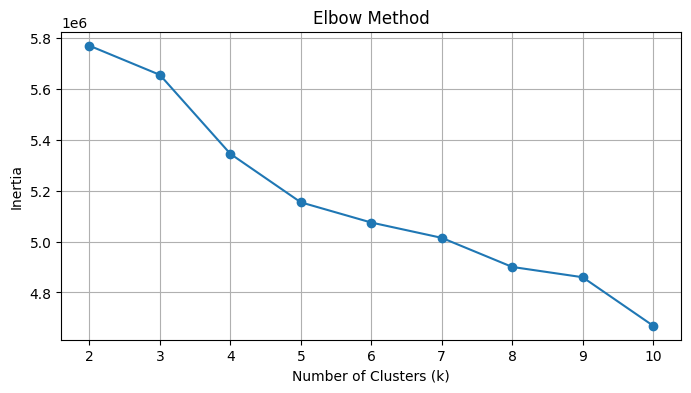

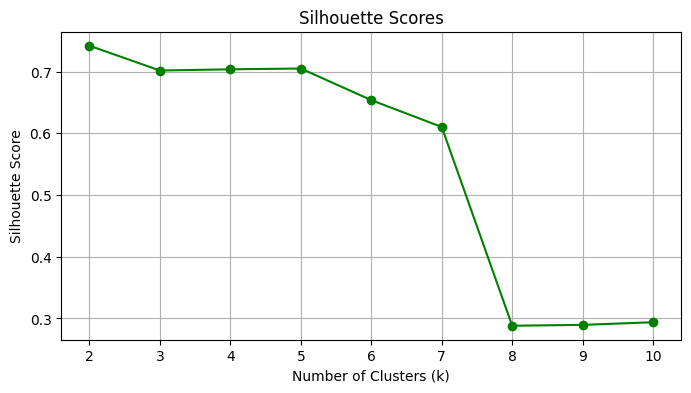

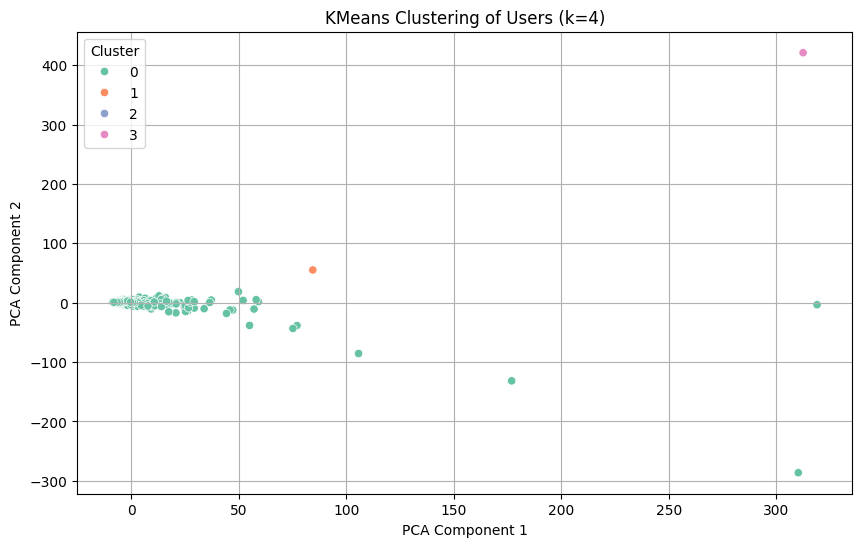

📌 Number of users in each cluster:
Cluster 0: 607 users
Cluster 1: 1 users
Cluster 2: 1 users
Cluster 3: 1 users


In [1]:
# step 1: import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# step 2: load the datasets

from google.colab import files
uploaded = files.upload()

ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
links = pd.read_csv("links.csv")

# step 3: data preprocessing

# Drop timestamp column
ratings.drop("timestamp", axis=1, inplace=True)

# Merge ratings with movie titles
ratings_movies = pd.merge(ratings, movies, on="movieId")

# Create user-movie rating matrix
user_movie_matrix = ratings_movies.pivot_table(index='userId', columns='title', values='rating')

# Fill missing values (unrated movies) with 0
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Normalize the data
scaler = StandardScaler()
user_movie_matrix_scaled = scaler.fit_transform(user_movie_matrix_filled)

# step 4: visualisation

plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()

# Top 10 Most Rated Movies
top_rated = ratings_movies['title'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='magma')
plt.title("Top 10 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.grid(True)
plt.show()

# PCA for 2D Projection
pca = PCA(n_components=2)
user_movie_pca = pca.fit_transform(user_movie_matrix_scaled)

# step 5: clustering with K-Means

inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_movie_matrix_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(user_movie_matrix_scaled, kmeans.labels_))

# Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Choose k (e.g., 4 based on plots)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(user_movie_matrix_scaled)

# Step 5: Cluster Visualization

plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_movie_pca[:, 0], y=user_movie_pca[:, 1], hue=clusters, palette='Set2')
plt.title(f"KMeans Clustering of Users (k={optimal_k})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Step 6: Conclusion

# Print cluster sizes
unique, counts = np.unique(clusters, return_counts=True)
cluster_summary = dict(zip(unique, counts))

print("📌 Number of users in each cluster:")
for cluster_id, size in cluster_summary.items():
    print(f"Cluster {cluster_id}: {size} users")